In [1]:
#linear algebra

import numpy as np

#data processing

import pandas as pd

#data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#algorithms

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor

#importing metrics

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error

In [40]:
#loading the data

df = pd.read_excel("flightsfaredata.xlsx")
                       
print(df.shape)

(3509, 10)


In [41]:
df.sample(10)

,Unnamed: 0,Airline,Source,Departure,Destination,Arrival,Duration,Stop(s),Date,Fare
2648,2648,IndiGo,Bangalore,11:10,Chennai,12:10,1h 00m,Non Stop,"Fri, 5 Aug","6,004"
3355,3355,IndiGo,Ahmedabad,04:30,Hyderabad,11:25,6h 55m,1 Stop,"Sat, 3 Sep","5,975"
811,811,IndiGo,Bangalore,15:25,Kolkata,18:00,2h 35m,Non Stop,"Sat, 6 Aug","9,049"
1856,1856,Air India,New Delhi,20:00,Kolkata,08:50\n+ 1 day,12h 50m,1 Stop,NaN,"10,848"
1398,1398,IndiGo,New Delhi,16:20,Kolkata,21:35,5h 15m,1 Stop,"Sat, 6 Aug","8,579"
160,160,Go First,New Delhi,09:30,Mumbai,18:35,9h 05m,1 Stop,"Sat, 6 Aug","8,579"
1683,1683,SpiceJet,New Delhi,13:05,Kolkata,18:10,5h 05m,1 Stop,"Sun, 4 Sep","7,383"
2857,2857,IndiGo,Bangalore,14:50,Chennai,15:55,1h 05m,Non Stop,"Sat, 3 Sep","3,694"
1929,1929,IndiGo,Mumbai,18:05,Bangalore,23:40,5h 35m,1 Stop,"Thu, 4 Aug","12,033"
2594,2594,Air India,Mumbai,18:35,Bangalore,10:30\n+ 1 day,15h 55m,2 Stop(s),NaN,"11,819"


# Data Cleaning & Data Analysis:

- So first we are going to remove the unnamed column
- Then we are going to look out for missing values and replace them accordingly.
- Afterwards we are going to check out for datatypes of the variables and do the necessary modification

In [42]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.sample()

,Airline,Source,Departure,Destination,Arrival,Duration,Stop(s),Date,Fare
367,Air India,New Delhi,05:15,Mumbai,22:05,16h 50m,1 Stop,"Thu, 1 Sep","7,247"


In [43]:
#now let's check out for duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,Airline,Source,Departure,Destination,Arrival,Duration,Stop(s),Date,Fare
630,Vistara,Bangalore,16:45,Kolkata,18:05\n+ 1 day,25h 20m,2 Stop(s),"Thu, 4 Aug","18,912"
633,Vistara,Bangalore,16:45,Kolkata,19:35\n+ 1 day,26h 50m,2 Stop(s),"Thu, 4 Aug","19,650"
656,Vistara,Bangalore,18:55,Kolkata,18:05\n+ 1 day,23h 10m,2 Stop(s),"Thu, 4 Aug","23,744"
657,Vistara,Bangalore,18:55,Kolkata,18:05\n+ 1 day,23h 10m,2 Stop(s),"Thu, 4 Aug","23,744"
658,Vistara,Bangalore,18:55,Kolkata,18:05\n+ 1 day,23h 10m,2 Stop(s),"Thu, 4 Aug","23,744"
...,...,...,...,...,...,...,...,...,...
3497,Vistara,Ahmedabad,08:25,Hyderabad,19:50,11h 25m,2 Stop(s),NaN,"10,688"
3499,Vistara,Ahmedabad,05:05,Hyderabad,17:00,11h 55m,2 Stop(s),NaN,"10,688"
3503,Vistara,Ahmedabad,08:30,Hyderabad,20:55,12h 25m,2 Stop(s),NaN,"12,287"
3504,Vistara,Ahmedabad,08:30,Hyderabad,20:55,12h 25m,2 Stop(s),NaN,"12,287"


- So the dataset has 80 duplicated rows present, we are going to drop it as duplicated data isn't very useful

In [44]:
#checking shape of dataset 
df.shape

(3509, 9)

In [45]:
#removing duplicated rows from the dataset
df.drop_duplicates(inplace=True)

#again checking for shape of the now data
df.shape

(3429, 9)

In [46]:
#Now, lets checking for missing values

df.isnull().sum()

Airline          0
Source           0
Departure        0
Destination      0
Arrival          0
Duration         0
Stop(s)          0
Date           594
Fare             0
dtype: int64

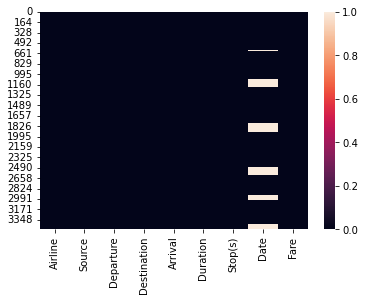

In [47]:
#plotting a heatmap for missing values
sns.heatmap(df.isnull())
plt.show()

- It can be seen that only 'Date' variable has gotten missing values. So, we have to replace the missing values as while converting categorical data to numerical data, missing values can't be converted

In [48]:
#checking for datatypes
df['Date'].dtypes

dtype('O')

- As, the variable has dataype of object type, I am going to use SimpleImputer to replace the missing values by using the strategy as most frequent or mode of the data.

In [49]:
from sklearn.impute import SimpleImputer       #importing the imputer

imp = SimpleImputer(strategy = 'most_frequent')
df['Date'] = imp.fit_transform(df['Date'].values.reshape(-1,1))

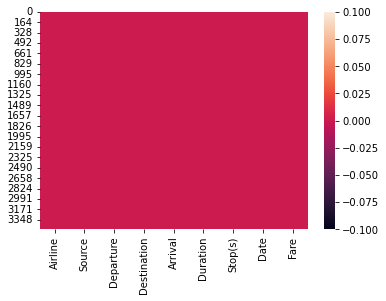

In [12]:
#plotting a heatmap for missing values

sns.heatmap(df.isnull())
plt.show()

- It can be seen that the missing values have been replaced

In [13]:
#now we are going to check the dataset further for data cleaning and data analysing purpose

df.sample()

,Airline,Source,Departure,Destination,Arrival,Duration,Stop(s),Date,Fare
455,Go First,New Delhi,20:50,Mumbai,23:20,2h 30m,Non Stop,"Sat, 3 Sep","4,878"


In [14]:
#checking for datatypes

df.dtypes

Airline        object
Source         object
Departure      object
Destination    object
Arrival        object
Duration       object
Stop(s)        object
Date           object
Fare           object
dtype: object

In [15]:
#checking for different values the variables have

for i in df.columns:
    print(df[i].value_counts(),'\n\n')

Vistara      1264
IndiGo        954
Air India     659
SpiceJet      222
Go First      184
Air Asia      146
Name: Airline, dtype: int64 


New Delhi    1317
Bangalore     958
Mumbai        692
Ahmedabad     462
Name: Source, dtype: int64 


07:00    100
21:20     77
09:30     62
21:40     59
07:20     58
        ... 
10:10      1
07:50      1
08:10      1
11:20      1
07:25      1
Name: Departure, Length: 205, dtype: int64 


Kolkata      1268
Bangalore     692
Mumbai        619
Hyderabad     462
Chennai       388
Name: Destination, dtype: int64 


08:50\n+ 1 day    98
09:40\n+ 1 day    87
19:55             67
08:55\n+ 1 day    55
11:50\n+ 1 day    52
                  ..
13:35              1
07:35\n+ 1 day     1
05:30              1
00:20\n+ 1 day     1
23:00\n+ 1 day     1
Name: Arrival, Length: 289, dtype: int64 


2h 10m     103
2h 05m     103
2h 15m      89
1h 40m      52
2h 35m      38
          ... 
22h 40m      1
27h 20m      1
39h 05m      1
23h 35m      1
42h 15m      1
Name:

- Firstly all the variables are of object datatype, which doesn't make sense for 'Departure' , 'Arrival' , 'Duration' and 'Fare' should be of numerical datatype
- 'Date' variable too should be of datetime datatype but as there are only a few different dates are present I am not going to change it
- 'Departure' , 'Arrival' show the time of the flight but in 24 hours day, So, I am going to transform two new variables from each of tese variable which would show the hour and minute separately 
- 'Duration' shows the total duration of a flight which is in hour and minute form, So I am going to convert it into minutes only for a better understanding
- The target variable 'Fare' shows the flight fare is of object datatype, it has ',' present separating the thousands, so I am going to replace it with a decimal values and then convert it into numerical variable

In [50]:
#firstly dealing with Departure and arrival

df['Departure'][5]    #checking a random value

'17:00'

In [51]:
df['Dep_hour'] = pd.to_datetime(df['Departure']).dt.hour     #using pandas to_datetime function and then extracting hour only
df['Dep_min'] = pd.to_datetime(df['Departure']).dt.minute    #applying same to extract minutes

#checking the newly created variable

df['Dep_hour']

0       20
1       19
2       21
3       17
4       15
        ..
3501    21
3502     8
3506     7
3507     7
3508     7
Name: Dep_hour, Length: 3429, dtype: int64

In [52]:
#now checking the arrival variable
df['Arrival']

0                22:10
1                21:15
2                23:35
3                22:10
4                17:40
             ...      
3501    12:30\n+ 1 day
3502             20:55
3506             21:40
3507             21:15
3508             21:40
Name: Arrival, Length: 3429, dtype: object

- The above variable has got some useless information, so I am going to remove the useless string

In [53]:
df['Arrival'] = df['Arrival'].apply(lambda x:x[:5])      #applying lambda function to remove the useless strings

df['Arrival_hour'] = pd.to_datetime(df['Arrival']).dt.hour  #using to_datetime and extracting hours only
df['Arrival_min'] = pd.to_datetime(df['Arrival']).dt.minute #same to extract minutes only

#checking the new variable

df['Arrival_hour']

0       22
1       21
2       23
3       22
4       17
        ..
3501    12
3502    20
3506    21
3507    21
3508    21
Name: Arrival_hour, Length: 3429, dtype: int64

In [54]:
#let's check out 'Duration'
df['Duration'][167]

'10h 05m'

In [55]:
#firstly removing the leading zero with empty string as it would give us error while converting
df['Duration'] = df['Duration'].str.replace(' 0',' ')

# and now converting the duration into minutes only

df['Duration_New']=df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval) 

#now let's checkout the new variable formed

df['Duration_New']

0       130
1       135
2       140
3       255
4       130
       ... 
3501    900
3502    745
3506    850
3507    825
3508    850
Name: Duration_New, Length: 3429, dtype: int64

In [56]:
#now lets deal with the target variable
df['Fare'][155]

'8,579'

In [57]:
#replacing the period with a decimal and rounding of the number
df['Fare'] = (pd.to_numeric(df['Fare'].apply(lambda x : x.replace(',','.')))).apply(lambda x : round(x,2))

#now checking the variable
df['Fare']

0        7.78
1        7.78
2        7.78
3        7.78
4        8.58
        ...  
3501    11.94
3502    12.29
3506    12.45
3507    13.71
3508    14.32
Name: Fare, Length: 3429, dtype: float64

In [58]:
#now again checking for datatype

df.dtypes

Airline          object
Source           object
Departure        object
Destination      object
Arrival          object
Duration         object
Stop(s)          object
Date             object
Fare            float64
Dep_hour          int64
Dep_min           int64
Arrival_hour      int64
Arrival_min       int64
Duration_New      int64
dtype: object

- So all the data transformation and data cleaning has been done

In [59]:
#let's further look into the data

df.describe()

,Fare,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_New
count,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000
mean,10.599942,13.101779,27.007874,14.861476,30.752406,663.463109
std,5.580293,5.660243,17.681801,6.016682,17.713597,463.875034
min,3.090000,0.000000,0.000000,0.000000,0.000000,60.000000
25%,6.400000,8.000000,10.000000,9.000000,15.000000,305.000000
50%,8.960000,13.000000,30.000000,16.000000,30.000000,565.000000
75%,12.450000,18.000000,45.000000,20.000000,50.000000,910.000000
max,34.880000,23.000000,55.000000,23.000000,55.000000,2535.000000


Observations:
- The maximum ticket price is around 34 thousand while the minimum is around 3 thousand only
- The flights run throughout the day
- The minimum duration of the flight is 60 minutes i.e. 1 hour while the maximum duration taken by a flight is around 42 hours
- Skewness as well as outliers might be present in the dataset

# Exploratory Data Analysis:

In [26]:
#checking the variables

df.columns

Index(['Airline', 'Source', 'Departure', 'Destination', 'Arrival', 'Duration',
       'Stop(s)', 'Date', 'Fare', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_New'],
      dtype='object')

In [27]:
#getting additional info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3429 entries, 0 to 3508
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       3429 non-null   object 
 1   Source        3429 non-null   object 
 2   Departure     3429 non-null   object 
 3   Destination   3429 non-null   object 
 4   Arrival       3429 non-null   object 
 5   Duration      3429 non-null   object 
 6   Stop(s)       3429 non-null   object 
 7   Date          3429 non-null   object 
 8   Fare          3429 non-null   float64
 9   Dep_hour      3429 non-null   int64  
 10  Dep_min       3429 non-null   int64  
 11  Arrival_hour  3429 non-null   int64  
 12  Arrival_min   3429 non-null   int64  
 13  Duration_New  3429 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 530.9+ KB


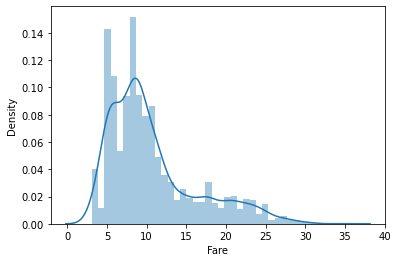

In [28]:
#plotting the distribution of the target variable
sns.distplot(df['Fare'])
plt.show()

- skewness is present in the data
- outliers are also there
- most flight fare is in range 5-15 thousand

<Figure size 1080x504 with 0 Axes>

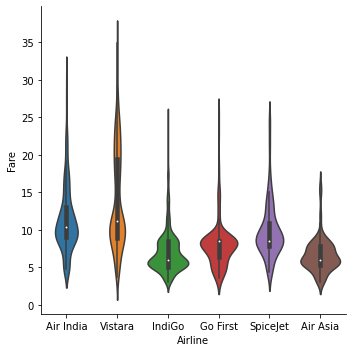

In [29]:
#plotting Airline and Fare

plt.figure(figsize=(15,7))
sns.catplot('Airline' , 'Fare' , data=df , kind='violin')
plt.show()

- Vistara Airline has the highest fares following by Air India
- Air Asia has the cheapest fares

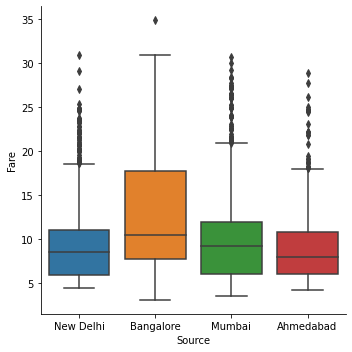

In [30]:
#plotting Source and Fare
sns.catplot('Source' , 'Fare' , data=df , kind='box')
plt.show()

- Source city Banglore has the highest fares following by Mumbai
- Delhi , Ahemdabad have comparatively low fares

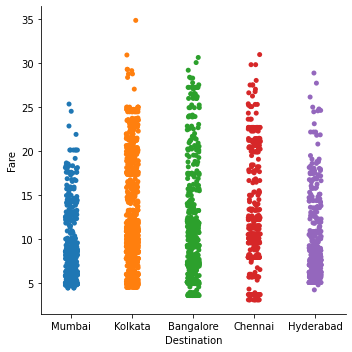

In [31]:
#plotting Destination and fare
sns.catplot('Destination' , 'Fare' , data=df)
plt.show()

- Banglore to Kolkata flight has the highest fare
- destination city Banglore , Chennai , Hyderbad have higher flight fares compared to Mumbai

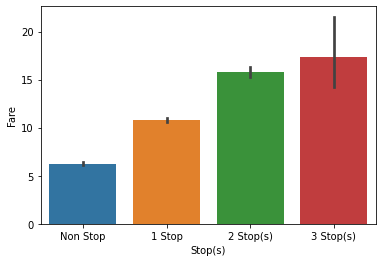

In [32]:
#plotting Stop(s) and Fare
sns.barplot('Stop(s)' , 'Fare', data=df)
plt.show()

- Stop(s) is highly correlated with the target variable
- Flight fares increase with increase in number of stops which means Non stop flights are cheapest, 3 Stop(s) flights are costliest

<Figure size 720x360 with 0 Axes>

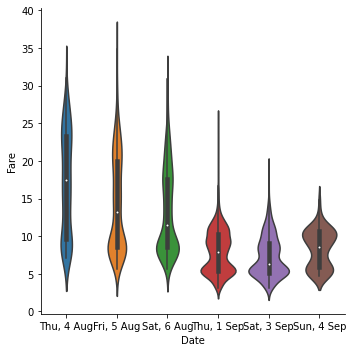

In [90]:
#plotting date and Fare
plt.figure(figsize=(10,5))
sns.catplot('Date' , 'Fare', data=df,kind='violin')
plt.show()

- Flighs fare vary with date as well
- As I have scraped data for upto 3 days of booking date and a month after booking data
- Current flight fares are reasonably higher than flights after a month

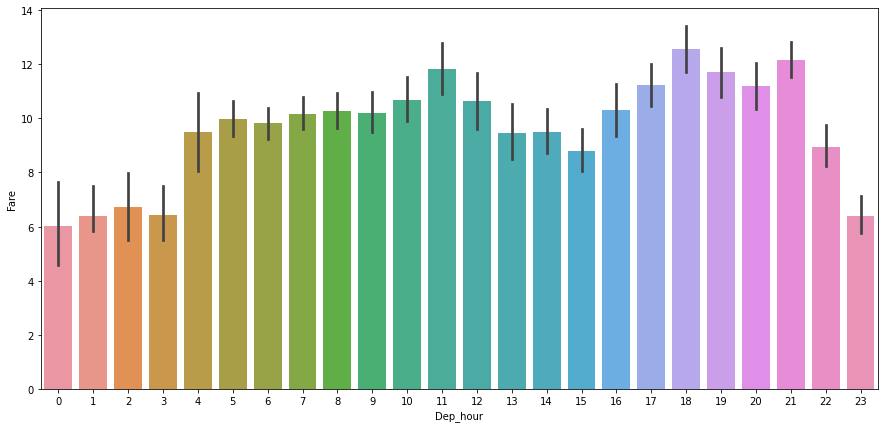

In [93]:
#plotting Dep_hour and Fare
plt.figure(figsize=(15,7))
sns.barplot('Dep_hour' , 'Fare', data=df)
plt.show()

- 11 PM to 3 AM flights are cheapest when compared to the flights departing all throughout the day
- 11 AM , 6 PM , 9 PM departing flights have the highest fares

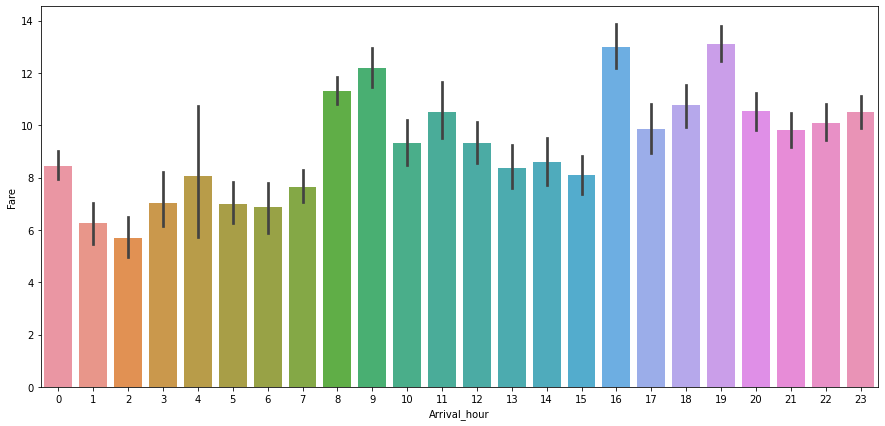

In [94]:
#plotting Arrival_hour and Fare
plt.figure(figsize=(15,7))
sns.barplot('Arrival_hour' , 'Fare', data=df)
plt.show()

- Flights arriving at 9 PM , 4 PM and 7 PM have the highest fares
- Flights arriving at 2 AM have the lowest fare

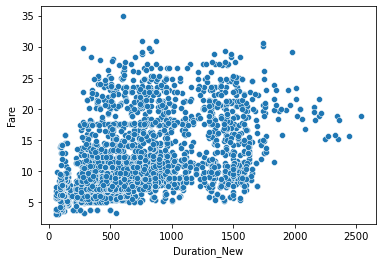

In [95]:
#plotting Duration_new and Fare
sns.scatterplot('Duration_New' , 'Fare' , data=df)
plt.show()

- the data is randomly distributed
- though lesser the duration lesser the fare but at very long duration as well fares are low

# Data Preprocessing:

In [33]:
df.columns

Index(['Airline', 'Source', 'Departure', 'Destination', 'Arrival', 'Duration',
       'Stop(s)', 'Date', 'Fare', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_New'],
      dtype='object')

In [60]:
#dropping Departure , Arrival and Duration from the dataset as they we have already created new variables from them
df.drop(['Departure' , 'Arrival' , 'Duration'] , axis=1 , inplace=True)

#again checking for columns
df.columns

Index(['Airline', 'Source', 'Destination', 'Stop(s)', 'Date', 'Fare',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_New'],
      dtype='object')

In [61]:
#checking for skewness

df.skew()

Fare            1.233312
Dep_hour        0.030561
Dep_min        -0.074894
Arrival_hour   -0.502056
Arrival_min    -0.189063
Duration_New    0.819794
dtype: float64

- I am going to assume the threshold for skewness as +/- 0.50,  only 'Fare' and 'Duration_New' are exceedingthe threshold, so let's transform them and reduce the skewness we are going to use log transformation on Fare which is apparently the target variable.

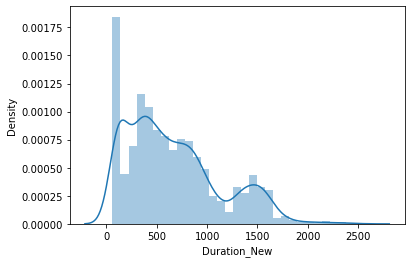

In [62]:
#we have already plotted distribution plot for Fare, So:
sns.distplot(df['Duration_New'])
plt.show()

In [63]:
#going to use Cube root transformation on Duration_New

df['Fare'] = np.log(df['Fare'])
df['Duration_New'] = np.cbrt(df['Duration_New'])

#checking for skewness
df.skew()

Fare            0.265808
Dep_hour        0.030561
Dep_min        -0.074894
Arrival_hour   -0.502056
Arrival_min    -0.189063
Duration_New   -0.041226
dtype: float64

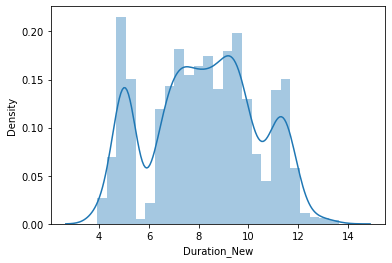

In [64]:
#checking distribution plot
sns.distplot(df['Duration_New'])
plt.show()

In [65]:
#checking for datatypes

df.dtypes

Airline          object
Source           object
Destination      object
Stop(s)          object
Date             object
Fare            float64
Dep_hour          int64
Dep_min           int64
Arrival_hour      int64
Arrival_min       int64
Duration_New    float64
dtype: object

In [66]:
#converting categorical variables into numerical ones using LabelEncoder

from sklearn.preprocessing import LabelEncoder

cat=[]          #creating a list of categorical variables
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)

for i in cat:
    df[i] = LabelEncoder().fit_transform(df[i])

In [67]:
#checking out correlation matrix 

df.corr()

,Airline,Source,Destination,Stop(s),Date,Fare,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_New
Airline,1.000000,-0.093103,-0.068914,-0.087973,-0.003320,0.276553,0.008125,0.192171,0.127746,0.165989,0.172994
Source,-0.093103,1.000000,0.359681,0.203145,0.036960,-0.060936,0.036910,-0.063992,-0.076702,-0.026427,-0.169682
Destination,-0.068914,0.359681,1.000000,0.066777,0.062321,-0.047561,0.026799,0.031305,-0.021375,-0.046526,-0.038522
Stop(s),-0.087973,0.203145,0.066777,1.000000,-0.029088,-0.345236,0.055978,-0.010583,-0.036595,-0.107702,-0.617759
Date,-0.003320,0.036960,0.062321,-0.029088,1.000000,-0.118654,0.180366,0.024963,-0.013199,0.011529,0.056198
Fare,0.276553,-0.060936,-0.047561,-0.345236,-0.118654,1.000000,0.083946,0.112840,0.081373,0.149455,0.583907
Dep_hour,0.008125,0.036910,0.026799,0.055978,0.180366,0.083946,1.000000,0.077602,-0.044393,0.061266,0.075545
Dep_min,0.192171,-0.063992,0.031305,-0.010583,0.024963,0.112840,0.077602,1.000000,0.018533,0.081514,0.073778
Arrival_hour,0.127746,-0.076702,-0.021375,-0.036595,-0.013199,0.081373,-0.044393,0.018533,1.000000,0.000882,0.014623
Arrival_min,0.165989,-0.026427,-0.046526,-0.107702,0.011529,0.149455,0.061266,0.081514,0.000882,1.000000,0.184921


In [68]:
#checking correlation with target variable of input variables

df.corr()['Fare'].sort_values()

Stop(s)        -0.345236
Date           -0.118654
Source         -0.060936
Destination    -0.047561
Arrival_hour    0.081373
Dep_hour        0.083946
Dep_min         0.112840
Arrival_min     0.149455
Airline         0.276553
Duration_New    0.583907
Fare            1.000000
Name: Fare, dtype: float64

- Duration_New , Airline , Stop(s) have a good correlation bond with the target variable
- Source , Destination , Arrival_hour , Dep_hour have a weak correlation with the target variable fare

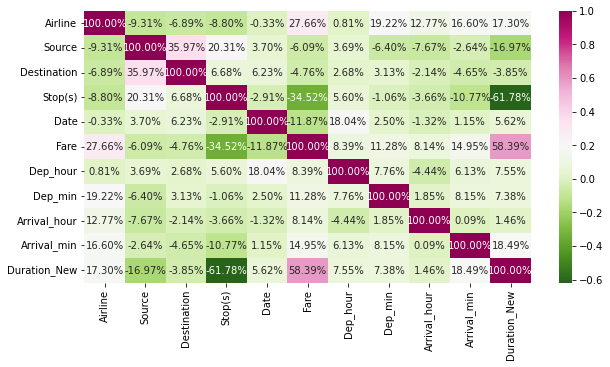

In [44]:
#plotting a heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2%',cmap='PiYG_r')
plt.show()

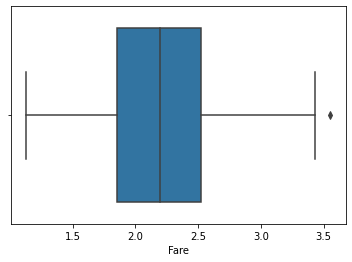

In [69]:
#now checking for outliers

sns.boxplot(df['Fare'])
plt.show()

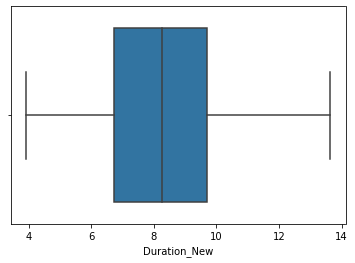

In [70]:
sns.boxplot(df['Duration_New'])
plt.show()

In [71]:
#lets check outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

# Feature Selection:

In [132]:
x = df.drop('Fare',axis=1)
y = df['Fare']

print('x:',x.shape)
print('y:',y.shape)

x: (3429, 10)
y: (3429,)


In [73]:
x

,Airline,Source,Destination,Stop(s),Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_New
0,1,3,4,3,5,20,0,22,10,5.065797
1,1,3,4,3,5,19,0,21,15,5.129928
2,1,3,4,3,5,21,15,23,35,5.192494
3,1,3,4,0,5,17,55,22,10,6.341326
4,5,3,4,3,5,15,30,17,40,5.065797
...,...,...,...,...,...,...,...,...,...,...
3501,1,0,2,1,4,21,30,12,30,9.654894
3502,5,0,2,1,4,8,30,20,55,9.065368
3506,1,0,2,1,4,7,30,21,40,9.472682
3507,1,0,2,1,4,7,30,21,15,9.378887


In [133]:
from sklearn.preprocessing import StandardScaler        #scaling the data

x_sca = StandardScaler().fit_transform(x)

# Building Models:

1. Linear Regression

In [75]:
lr=LinearRegression()

#checking best random state

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=i,test_size=.33)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 40.650034158977974
Testing accuracy score is 41.066114897542406 

At random state 21 the model performs very well
At random state 21 :
Training accuracy score is 40.71902398925006
Testing accuracy score is 40.81106953335396 

At random state 22 the model performs very well
At random state 22 :
Training accuracy score is 40.75470244131534
Testing accuracy score is 40.70957855966325 

At random state 24 the model performs very well
At random state 24 :
Training accuracy score is 40.80172708243126
Testing accuracy score is 40.78063218889404 

At random state 28 the model performs very well
At random state 28 :
Training accuracy score is 40.81294418557645
Testing accuracy score is 40.55188161089674 

At random state 35 the model performs very well
At random state 35 :
Training accuracy score is 40.51935216073367
Testing accuracy score is 41.2058774115069 

At random state 61 the model performs ver

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)

In [77]:
#checking error for LinearRegression

mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)
print(mselr)
print(maelr)

0.14392757018797595
0.30584083904510295


2. Regularization
- Lasso 
- Ridge

In [78]:
#Lasso

x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)
r2_score(y_test,predls)

0.4074290536490781

In [79]:
#checking error for Lasso 

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
print(msels)
print(maels)

0.14388266750065803
0.30670033442935274


In [80]:
#Ridge

lrr=Ridge(alpha=0.01)
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)

40.72440764601952


In [81]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
print(mselrr)
print(maelrr)

0.14392758197297084
0.30584097061634213


3. KNeighbors

In [82]:
#KNeighbors

knn=KNeighborsRegressor(n_neighbors=3)
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn)*100)

52.323163888409354


In [83]:
#checking error for KNeighbors

mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)
print(mseknn)
print(maeknn)

0.11576454093759994
0.24894754791972684


4. DecisionTree

In [84]:
#DecisionTree

dtc=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc)*100)

78.95021196739968


In [85]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)
print(msedtc)
print(maedtc)

0.051111173625788237
0.12949816560415395


5. Ensemble:
- AdaBoost
- GradientBoosting
- RandomForest

In [86]:
#AdaBoost

ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada)*100)

68.76404848379421


In [87]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)
maeada=mean_absolute_error(y_test,predada)
print(mseada)
print(maeada)

0.07584428588254427
0.228748916195758


In [88]:
#Gradient Boosting

gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb)*100)

84.14544411232707


In [89]:
#checking error for GradientBoosting

msegb=mean_squared_error(y_test,predgb)
maegb=mean_absolute_error(y_test,predgb)
print(msegb)
print(maegb)

0.0384965852140465
0.14713602379185414


In [90]:
#RandomForest

rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

87.34400865674255


In [91]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
print(mserf)
print(maerf)

0.030730122790305216
0.11362084158955496


6. XGBoost

In [92]:
#XGBoost

xgb=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(r2_score(y_test,predxgb)*100)

88.84357686644684


In [93]:
#checking error for XGB

msexgb=mean_squared_error(y_test,predxgb)
maexgb=mean_absolute_error(y_test,predxgb)
print(msexgb)
print(maexgb)

0.02708900816192001
0.11162526108661801


# Best Model?

In [130]:
results = pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mseknn,msedtc,mseada,msegb,mserf,msexgb],'Mean Absolute Error':[maelr,maels,maelrr,maeknn,maedtc,maeada,maegb,maerf,maexgb],'Accuracy Score':[r2_score(y_test,predlr),r2_score(y_test,predls),r2_score(y_test,predlrr),r2_score(y_test,predknn),r2_score(y_test,preddtc),r2_score(y_test,predada),r2_score(y_test,predgb),r2_score(y_test,predrf),r2_score(y_test,predxgb)]},index=['LinearRegression','Lasso','Ridge','KNeighborsRegressor','DecisionTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor','RandomForestRegressor','XGBRegressor'])
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df

,Mean Squared Error,Mean Absolute Error,Accuracy Score
XGBRegressor,0.027089,0.111625,0.888436
RandomForestRegressor,0.030730,0.113621,0.873440
GradientBoostingRegressor,0.038497,0.147136,0.841454
DecisionTreeRegressor,0.051111,0.129498,0.789502
AdaBoostRegressor,0.075844,0.228749,0.687640
KNeighborsRegressor,0.115765,0.248948,0.523232
Lasso,0.143883,0.306700,0.407429
LinearRegression,0.143928,0.305841,0.407244
Ridge,0.143928,0.305841,0.407244


- The XGBoost model is working so well, with high accuracy score and lowest errors

But let's checkout for cross validation score before jumping onto conclusions

In [95]:
#Cross validation for XGBoost

xgb = XGBRegressor()
scores = cross_val_score(xgb, x_sca, y, cv=10)
print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std())

Scores: [0.72561767 0.72679586 0.78905531 0.79516672 0.77610727 0.6588049
 0.87932239 0.8691798  0.64758214 0.48817236] 

Mean: 0.7355804414860366 

Standard Deviation: 0.11026713740320776


- So this means that the model is perfoming much realistic with gbr,the mean of the scores is 74% for our model and standard deviation in our case means that the score can differ with +/- 11%

In [96]:
#lets checkout the feature importance 

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(xgb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Airline,0.249
Duration_New,0.229
Date,0.188
Stop(s),0.113
Destination,0.057
Source,0.055
Dep_min,0.034
Arrival_hour,0.028
Arrival_min,0.026


<AxesSubplot:xlabel='feature'>

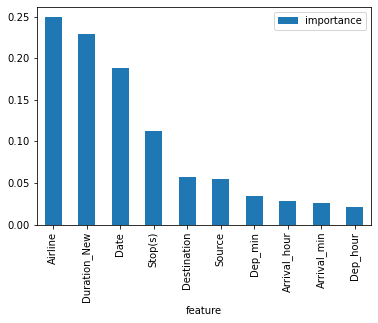

In [97]:
importances.plot.bar()

- So according to the XBGRegressor Airline is the most important feature following by Duration and Date of journey
- Source , Destination , Arrival time and departure time doesn't have much importance in predicting the flight fares for XGBoost

So, I am going to drop low feature importance variable and check out the performance of the model

In [105]:
x_new = x.drop(['Destination','Source','Dep_hour','Arrival_hour','Dep_min','Arrival_min'],axis=1)

x_new = StandardScaler().fit_transform(x_new)

- All these variables that I have just dropped from the predictors have low feature importance and weak correlation as well with the target variable

In [106]:
#now trying out with new features

xgb = XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=76,test_size=.33)

xgb.fit(x_train,y_train)
y_prediction = xgb.predict(x_test)

acc_xgb=round(r2_score(y_test, y_prediction)*100,2)
print(acc_xgb,"%")

81.83 %


- The accuracy has dropped down after removal of the less important features , so we won't drop these variables

# Hyperparameter Tuning:

In [131]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV              #importing HalvingGridSearch

In [135]:
xgb = XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,random_state=76,test_size=.33)

In [ ]:
parameter = {'n_estimators':[400,500],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

search = HalvingGridSearchCV(xgb, parameter, verbose= 10).fit(x_train, y_train)
search.best_params_  

- Now that we have optimum values of the hyperparameters we are going to train the model again and check for accuracy

In [136]:
Final_mod=XGBRegressor(booster='dart', max_depth=8, eta=0.1,
                                gamma=0.1, n_estimators=400)

Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 87.93981513662095
mean_squared_error: 0.029283439888165185
mean_absolute_error: 0.11799616207025317
RMSE value: 0.1711240482461924


In [137]:
#Cross validation for XGBoost

xgb = XGBRegressor(booster='dart', max_depth=8, eta=0.1,
                                gamma=0.1, n_estimators=400)
scores = cross_val_score(xgb, x_new, y, cv=10)
print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std())

Scores: [0.68663501 0.76759705 0.75162955 0.82814074 0.71560589 0.68529052
 0.83731939 0.85803738 0.57700641 0.4472544 ] 

Mean: 0.715451634086339 

Standard Deviation: 0.12031052182288585


- So, the model is performing well with an realistic accuracy of 80.92%
- Moreover, the CV score is coming out to be 72% with an deviation of 12% , which means the score can vary upto +/- 12

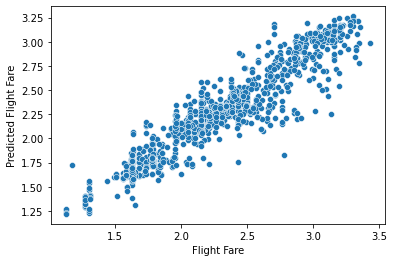

In [138]:
#now plotting both predicted and actual values

sns.scatterplot(y_test , pred)
plt.xlabel("Flight Fare")
plt.ylabel("Predicted Flight Fare")
plt.show()

# Saving Model

In [139]:
#saving the best model

xgb = XGBRegressor(booster='dart', max_depth=8, eta=0.1,
                                gamma=0.1, n_estimators=400)
import pickle
pickle.dump( xgb ,open('flightsfareprediction.pkl','wb'))

# Predictions using Final Model

In [140]:

loaded_model = pickle.load(open('flightsfareprediction.pkl', 'rb'))

model.fit(x_train,y_train)
y_prediction = model.predict(x_test)
y_prediction

array([1.7532468, 2.1578794, 1.9408877, ..., 1.372858 , 1.8299108,
       2.309713 ], dtype=float32)

In [141]:
preddf=pd.DataFrame({"Flight Fare" : y_test, "Predicted Flight Fare" : y_prediction})
preddf

,Flight Fare,Predicted Flight Fare
1069,1.680828,1.753247
379,2.102914,2.157879
2136,2.123458,1.940888
1135,2.256541,2.269693
3010,1.954445,2.182814
...,...,...
2256,1.629241,1.761836
1806,1.783391,1.796660
2242,1.313724,1.372858
2390,1.629241,1.829911
